# Preprocessing and EDA

This notebook contains code for pre-processing and some exploratory analysis of the [whats-cooking dataset from Kaggle](https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset), carried out with the aim of understanding the dataset and planning next steps for implimentation of a predictive ml model.

In [25]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import statistics

%matplotlib inline

### Pandas profiling
Reading the json dataset into a pd dataframe and generating an EDA using pandas_profiling (found in index.html).

In [19]:
df = pd.read_json('dataset.json')
print(df.head())
print(df.shape)

df_for_profiling = df.copy() # copy the df to stringify the ingredient col for profiling
df_for_profiling['ingredients'] = [', '.join(x).strip().lower() for x in df_for_profiling['ingredients']]
profile = df_for_profiling.profile_report()
profile.to_file('index.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

      id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...
(39774, 3)


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1101.45it/s]


### Cuisine counts (distribution)
Understanding the types of cuisine and number of recipes for each type of cuisine - there are 20 types of cuisines, mostly italian and mexican.

In [20]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

### Stringify ingredients 
Converting the ingredients into lowercase and adding a col to the dataset with the ingredients in string form.

In [21]:
df['ingredients_str'] = [', '.join(x).strip().lower() for x in df['ingredients']]
print(df.head())

      id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

                                     ingredients_str  
0  romaine lettuce, black olives, grape tomatoes,...  
1  plain flour, ground pepper, salt, tomatoes, gr...  
2  eggs, pepper, salt, mayonaise, cooking oil, gr...  
3                  water, vegetable oil, wheat, salt  
4  black pepper, shallots, cornflour, cayenne pep...  


### Unique and unusual ingredients
Checking the number of unique ingredients - 6714, most and least common ingredients.

In [22]:
ing_2d = list(df['ingredients'])
all_ing = [ing for sublist in ing_2d for ing in sublist]

print(f'number of unique ingredients >> {len(set(all_ing))}')

ing_counts = Counter(all_ing)
print(f'most common ingredients >>> {ing_counts.most_common(10)}')
print(f'least common ingredients >>> {ing_counts.most_common()[6700:]}')

number of unique ingredients >> 6714
most common ingredients >>> [('salt', 18049), ('onions', 7972), ('olive oil', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632)]
least common ingredients >>> [('tongue', 1), ('Daiya', 1), ('curry mix', 1), ('Kraft Slim Cut Mozzarella Cheese Slices', 1), ('Oscar Mayer Cotto Salami', 1), ('Challenge Butter', 1), ('orange glaze', 1), ('cholesterol free egg substitute', 1), ('ciabatta loaf', 1), ('Lipton® Iced Tea Brew Family Size Tea Bags', 1), ('Hidden Valley® Greek Yogurt Original Ranch® Dip Mix', 1), ('lop chong', 1), ('tomato garlic pasta sauce', 1), ('crushed cheese crackers', 1)]


### Wordcloud generation
Generating a wordcloud with the ingredient names.

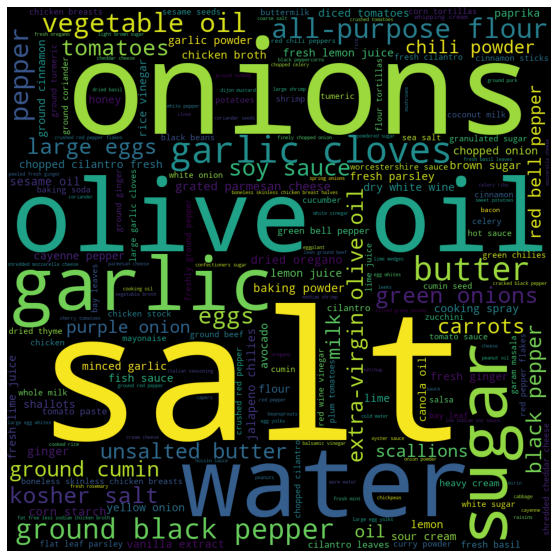

In [29]:
word_cloud_dict = Counter(all_ing)

cloud = WordCloud(width=1000, height=1000).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('graphs_and_vis/ingredient_wordcloud.png', bbox_inches='tight')
plt.show()
plt.close()

### Cuisine counts bar-plot
Generating a barplot with the cuisine counts to understand the distribution better.

Counter({'italian': 7838, 'mexican': 6438, 'southern_us': 4320, 'indian': 3003, 'chinese': 2673, 'french': 2646, 'cajun_creole': 1546, 'thai': 1539, 'japanese': 1423, 'greek': 1175, 'spanish': 989, 'korean': 830, 'vietnamese': 825, 'moroccan': 821, 'british': 804, 'filipino': 755, 'irish': 667, 'jamaican': 526, 'russian': 489, 'brazilian': 467})


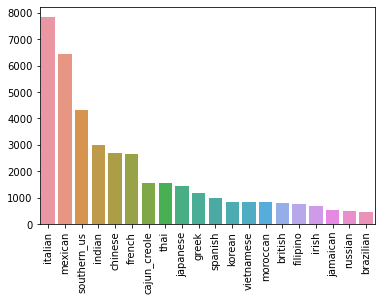

In [30]:
cuisine_counts = Counter(df['cuisine'])
print(cuisine_counts)

x_ax = [c for c,f in cuisine_counts.most_common()]
y_ax = [f for c,f in cuisine_counts.most_common()]
bar = sns.barplot(x = x_ax, y = y_ax)
for item in bar.get_xticklabels():
    item.set_rotation(90)
    item.set_color('black')

for item in bar.get_yticklabels():
    item.set_color('black')

bar.figure.savefig('graphs_and_vis/cuisine_counts.png', bbox_inches='tight')

### Can the ingredient list length be a feature?
Checking to see if the number of ingredients could be a feature (whether there are any identifiable patterns with cuisine of a particular type having a longer/shorted ingredient list).
This does not seem to be the case since the averages are mostly consistent.

In [31]:
num_ing = dict(zip(cuisine_counts.keys(), [list() for x in cuisine_counts.keys()]))
for id, row in df.iterrows():
    num_ing[row['cuisine']].append(len(row['ingredients']))
tab = [['Ingredient', 'Average', 'Min', 'Max', 'SD', 'Variance']]
for c, f in num_ing.items():
    tab.append([c, round(statistics.mean(f), 2), min(f), max(f), statistics.stdev(f), statistics.variance(f)])

num_ing_df = pd.DataFrame(tab)
print(num_ing_df)

num_ing_df.to_csv('ingredient_counts.csv')


               0        1    2    3         4          5
0     Ingredient  Average  Min  Max        SD   Variance
1          greek    10.18    1   27  3.729461   13.90888
2    southern_us     9.63    1   40  3.869404   14.97229
3       filipino       10    2   38  3.855135  14.862069
4         indian    12.71    1   49  5.016806  25.168342
5       jamaican    12.21    2   35  4.763897  22.694713
6        spanish    10.42    1   35  4.160919  17.313245
7        italian     9.91    1   65  3.806708  14.491022
8        mexican    10.88    1   52  4.660183  21.717307
9        chinese    11.98    2   38  4.042125  16.338776
10       british     9.71    2   30  4.165011  17.347317
11          thai    12.55    1   40  4.411794  19.463927
12    vietnamese    12.68    1   31  5.256173  27.627355
13  cajun_creole    12.62    2   31  4.611601  21.266867
14     brazilian     9.52    2   59  5.555139  30.859564
15        french     9.82    1   31  4.144744  17.178903
16      japanese     9.74    1 

### Can recipes with 1 ingredient be useful?
Based on the previous step, checking to see whether recipes with a single/few ingredients could be removed.
Continuing to include such recipes since the ingredients seem to be strongly correlated, for ex sushi with Japanese cuisine (based on looking at the result, not statistical analysis).

In [32]:
tab = [['Cuisine', 'Ingredient']]
for id, row in df.iterrows():
    if len(row['ingredients']) < 2:
        tab.append([row['cuisine'], row['ingredients_str']])

print(pd.DataFrame(tab))

              0                         1
0       Cuisine                Ingredient
1      japanese                sushi rice
2    vietnamese        dried rice noodles
3        indian      plain low-fat yogurt
4        indian           unsalted butter
5      japanese                      udon
6          thai               sticky rice
7        indian                    butter
8       mexican            corn tortillas
9          thai                   grained
10  southern_us      lemonade concentrate
11         thai              jasmine rice
12       indian           unsalted butter
13      italian           cherry tomatoes
14       french                    butter
15       indian                cumin seed
16       french            haricots verts
17      mexican             vegetable oil
18      spanish           spanish chorizo
19      spanish  sweetened condensed milk
20     japanese                     water
21        greek                    phyllo
22       indian           unsalted

Considered whether to eliminate common ingredients/those that made an appearance in every type of cuisine. Based on the EDA deciding to leave these as is, because removal may result in loss of important decision points.

### Checking whether stemming/lemmatization preserves ingredient context.
Some experiements to determine need for further pre-processing - based on this, stemming was not done since it would remove data (baked potatoes and baking potatoes are completely different ingredients)

In [33]:
from nltk import WordNetLemmatizer
import inflect

words = ['baked potatoes', 'baking potatoes', 'BaKeD Potato', 'BAKING POTATOE']
p = inflect.engine()
wn = WordNetLemmatizer()
form = [w.strip().lower() for w in words]
print(form)

sing = [p.singular_noun(w) or w for w in form]
print(sing)

lem = [wn.lemmatize(w) for w in sing]
print(lem)

['baked potatoes', 'baking potatoes', 'baked potato', 'baking potatoe']
['baked potato', 'baking potato', 'baked potato', 'baking potatoe']
['baked potato', 'baking potato', 'baked potato', 'baking potatoe']
